In [33]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import raw data from a CSV file
raw_data = pd.read_csv('../data/raw/hotel_booking_cancellation_prediction.csv')

# Create a copy of the raw data for further processing
df = raw_data.copy()

# Display the first few rows of the DataFrame
df


,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,stays_in_weeks_nights
0,0,Resort Hotel,0,203,2016,December,49,2,2.0,5,...,250.0,NaN,0,Transient,66.8,0,0,Check-Out,12/9/2016,NaN
1,1,City Hotel,1,82,2015,July,29,16,0.0,3,...,9.0,NaN,0,Transient,76.5,0,0,Canceled,7/16/2015,NaN
2,2,City Hotel,0,25,2016,December,53,27,0.0,3,...,220.0,NaN,0,Transient-Party,60.0,0,1,Check-Out,12/30/2016,NaN
3,3,City Hotel,0,1,2016,March,11,9,0.0,1,...,9.0,NaN,0,Transient-Party,NaN,0,0,Check-Out,3/10/2016,NaN
4,4,City Hotel,0,70,2017,April,16,16,2.0,2,...,9.0,NaN,0,Transient,108.0,0,0,Check-Out,4/20/2017,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,City Hotel,0,212,2016,May,21,20,2.0,3,...,21.0,NaN,0,Transient-Party,78.0,0,1,Check-Out,5/25/2016,NaN
9996,9996,City Hotel,1,5,2016,February,7,13,2.0,1,...,9.0,NaN,0,Transient,79.0,0,0,No-Show,2/13/2016,NaN
9997,9997,City Hotel,0,72,2017,July,30,27,1.0,3,...,14.0,NaN,0,Transient,109.8,0,0,Check-Out,7/31/2017,NaN
9998,9998,City Hotel,0,10,2016,May,19,6,2.0,2,...,9.0,NaN,0,Transient,141.0,0,1,Check-Out,5/10/2016,NaN


In [34]:
# Exploring the data
df.head(10)

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,stays_in_weeks_nights
0,0,Resort Hotel,0,203,2016,December,49,2,2.0,5,...,250.0,NaN,0,Transient,66.80,0,0,Check-Out,12/9/2016,NaN
1,1,City Hotel,1,82,2015,July,29,16,0.0,3,...,9.0,NaN,0,Transient,76.50,0,0,Canceled,7/16/2015,NaN
2,2,City Hotel,0,25,2016,December,53,27,0.0,3,...,220.0,NaN,0,Transient-Party,60.00,0,1,Check-Out,12/30/2016,NaN
3,3,City Hotel,0,1,2016,March,11,9,0.0,1,...,9.0,NaN,0,Transient-Party,NaN,0,0,Check-Out,3/10/2016,NaN
4,4,City Hotel,0,70,2017,April,16,16,2.0,2,...,9.0,NaN,0,Transient,108.00,0,0,Check-Out,4/20/2017,NaN
5,5,City Hotel,0,170,2017,April,17,27,0.0,3,...,9.0,NaN,0,Transient,130.50,0,0,Check-Out,4/30/2017,NaN
6,6,City Hotel,1,21,2016,March,10,4,0.0,1,...,9.0,NaN,0,Transient-Party,85.00,0,0,Canceled,2/26/2016,NaN
7,7,City Hotel,0,102,2015,October,42,16,0.0,2,...,6.0,NaN,0,Transient-Party,109.00,0,0,Check-Out,10/18/2015,NaN
8,8,Resort Hotel,0,55,2016,November,47,19,2.0,5,...,314.0,NaN,0,Transient,67.44,0,0,Check-Out,11/26/2016,NaN
9,9,Resort Hotel,0,222,2015,September,38,14,1.0,1,...,68.0,NaN,0,Transient,80.00,0,0,Check-Out,9/16/2015,NaN


Canceled book:  37.68
Not canceled book:  62.32


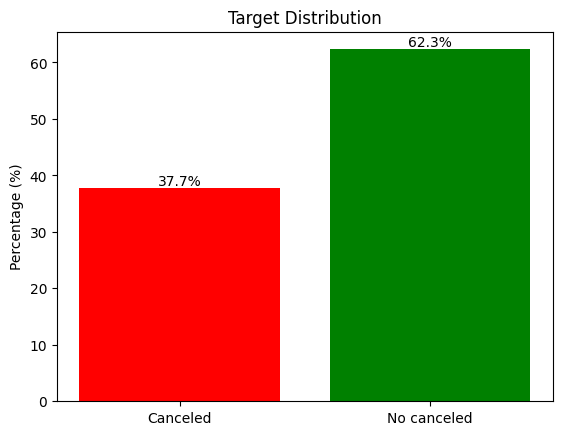

In [35]:
# Data visualisation

is_canceled_true = ((df['is_canceled'] == 1).sum()/len(df['is_canceled']))*100
is_canceled_false = ((df['is_canceled'] == 0).sum()/len(df['is_canceled']))*100

print("Canceled book: ", is_canceled_true)
print("Not canceled book: ", is_canceled_false)

# Create the bars
bars = plt.bar(['Canceled', 'No canceled'], [is_canceled_true, is_canceled_false], color=['red', 'green'])

# Add the text to bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.1f}%', ha='center', va='bottom')

# Adaugă titlu
plt.title('Target Distribution')
plt.ylabel('Percentage (%)')

# Afișează graficul
plt.show()

In [36]:
# Check for missing values in the dataset

def check_missing_values(data):
    return data.isnull().sum()


# Check for duplicate rows in the dataset
def check_duplicate_rows(data):
    return data.duplicated().sum()

# Check for 0 values in the dataset
def get_zero_counts(data):
    zero_counts = (data == 0).sum()
    zero_counts = zero_counts[zero_counts > 0]  # Only columns with at least one zero
    return zero_counts.reset_index().rename(columns={'index': 'Column', 0: 'Zero_Count'})



Zero counts in the dataset:
                            Column  Zero_Count
0                       Unnamed: 0           1
1                      is_canceled        6232
2                        lead_time         520
3          stays_in_weekend_nights        4401
4             stays_in_week_nights         616
5                           adults          35
6                         children        9266
7                           babies        9934
8                is_repeated_guest        9697
9           previous_cancellations        9437
10  previous_bookings_not_canceled        9714
11                 booking_changes        8540
12            days_in_waiting_list        9693
13                             adr         135
14     required_car_parking_spaces        9419
15       total_of_special_requests        5972
Missing values in each column:
stays_in_weekend_nights: 0.13% (13 missing values)
country: 0.50% (50 missing values)
reserved_room_type: 3.24% (324 missing values)
agent: 1

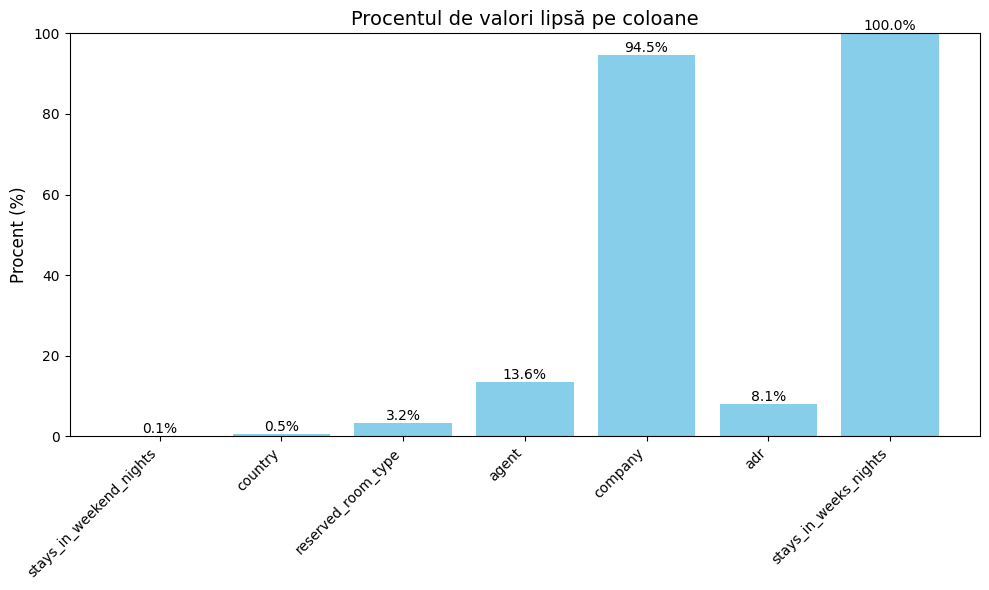

In [37]:
# Call the functions to check for missing values, zeros and duplicate rows
missing_values = check_missing_values(df)
duplicate_rows = check_duplicate_rows(df)
zero_counts = get_zero_counts(df)

print("\nZero counts in the dataset:")
print(zero_counts)

print("Missing values in each column:")
missing_values_percentage  = (missing_values / len(df)) * 100 # Calculate percentage of missing values
missing_values_percentage = missing_values_percentage[missing_values_percentage > 0]  # Only columns with missing values


for col in missing_values_percentage.index:
	print(f"{col}: {missing_values_percentage[col]:.2f}% ({missing_values[col]} missing values)")

print("\nNumber of duplicate rows in the dataset:")
print(duplicate_rows)

# Creează graficul
plt.figure(figsize=(10, 6))
bars = plt.bar(missing_values_percentage.index, missing_values_percentage, color='skyblue')

# Adaugă procentele pe bare
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.1f}%', ha='center', va='bottom')

# Personalizează graficul
plt.title('Procentul de valori lipsă pe coloane', fontsize=14)
plt.ylabel('Procent (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotire etichete pe axa X pentru lizibilitate
plt.ylim(0, 100)  # Setează limita maximă la 100%

# Afișează graficul
plt.tight_layout()  # Ajustează layout-ul pentru a evita suprapunerile
plt.show()

In [38]:
df = df.rename(columns={'Unnamed: 0': 'Index'})
#df

In [39]:
# Remove rows where 'adults' column has a value of 0
for x in df.index:
    if df.loc[x, 'adults'] == 0:
        df.drop(x, inplace=True)

#df.adults

In [40]:
# Fill missing country values with 'Unknown'
df['country'] = df['country'].fillna('Unknown')  

In [41]:
# Fill missing values in 'agent', 'company' column with 0
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)

# Create new columns 'is_agent' and 'is_company' to indicate if the agent or company is present
df['is_agent'] = df['agent'].apply(lambda x: 1 if x != 0 else 0)
df['is_company'] = df['company'].apply(lambda x: 1 if x != 0 else 0)

# Drop the original 'agent' and 'company' columns
df.drop(columns=['agent', 'company'], inplace=True, errors='ignore')

#df


In [42]:
# Replace 'Undefined' values in 'meal' column with 'SC' - No meal
for x in df.meal:
    if x == 'Undefined':
        df['meal'] = df['meal'].replace('Undefined', 'SC')


In [27]:
# Create new columns 'is_children' and 'is_babies' to indicate if there is children or babies
df['is_children'] = df['children'].apply(lambda x: 1 if x > 0 else 0)
df['is_babies'] = df['babies'].apply(lambda x: 1 if x > 0 else 0)


#df

In [43]:
# Fill missing values in 'stays_in_weekend_nights' and 'stays_in_week_nights' columns with 0
# Added after the analyze
df['stays_in_weekend_nights'] = df['stays_in_weekend_nights'].fillna(0)
df['stays_in_week_nights'] = df['stays_in_week_nights'].fillna(0)

# Create a new column 'stays_in_weeks_nights' that sums 'stays_in_weekend_nights' and 'stays_in_week_nights'
df['stays_in_weeks_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']



Total nights with zero stays:  48
Number of error rows:  48
stays_in_week_nights       0
stays_in_weekend_nights    0
dtype: int64
9965


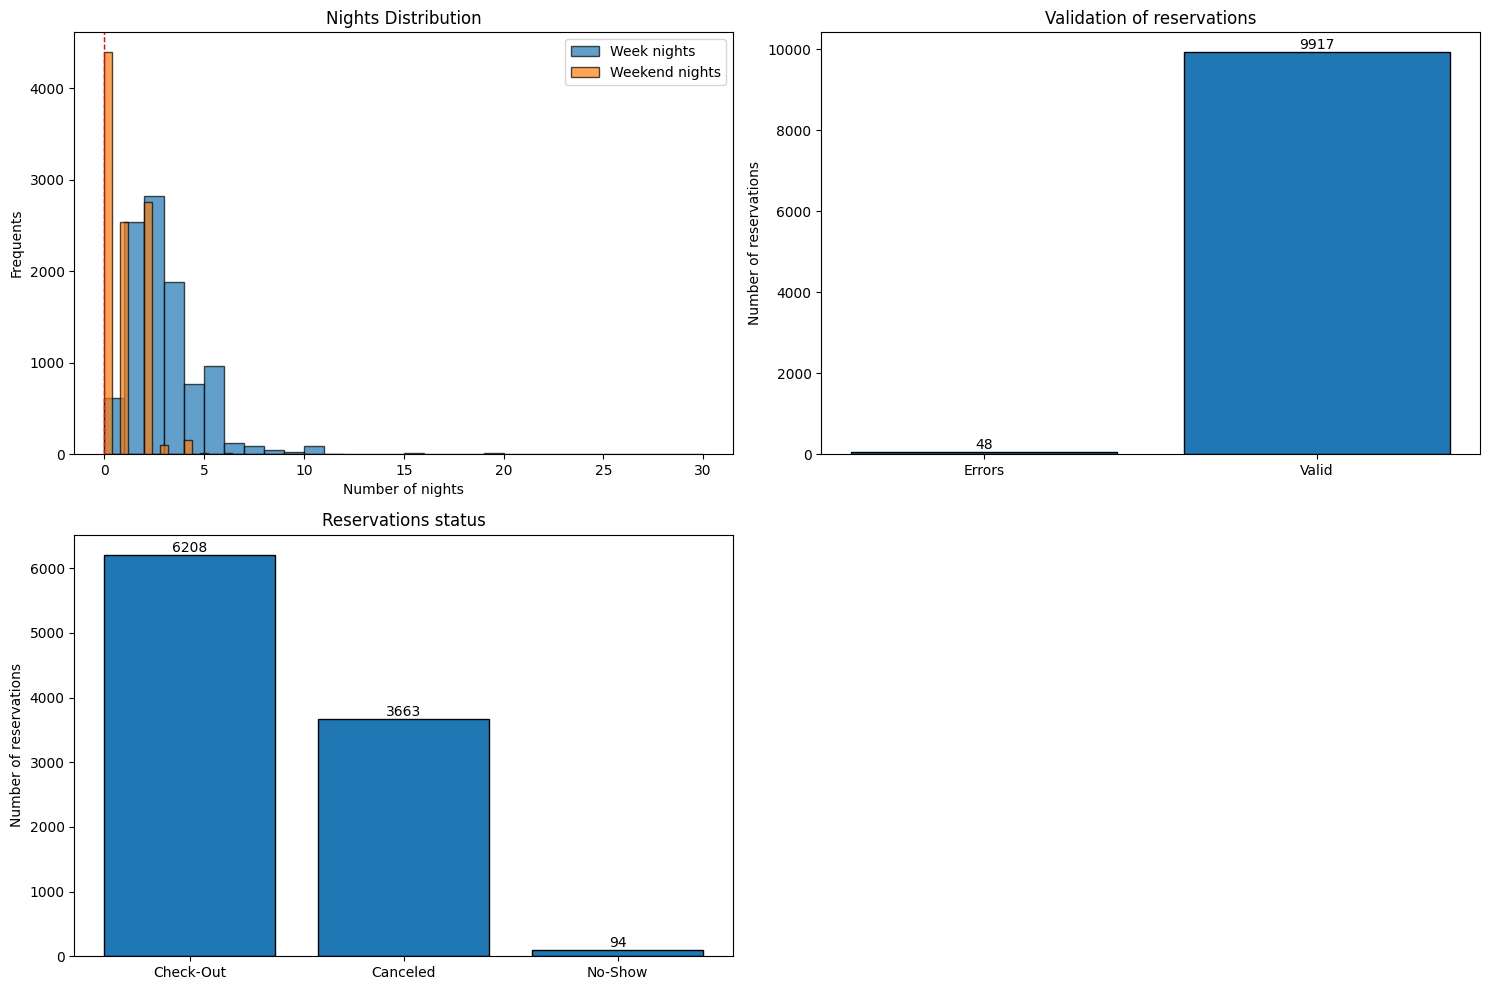

In [51]:
# Analyze the 'stays_in_week_nights' and 'stays_in_weekend_nights' column and is_canceled and 
# reservation_status

# Check for zeros in 'stays_in_week_nights' and 'stays_in_weekend_nights'
total_nights = ((df['stays_in_week_nights'] == 0) & (df['stays_in_weekend_nights'] == 0)).sum()
number_of_error_rows = 0


'''The purpose of this logic is to count the number of records where a booking 
is marked as completed and not canceled, but the total number of nights stayed is zero'''

for x in df.index:
    if (df.loc[x, 'stays_in_week_nights'] == 0) and (df.loc[x, 'stays_in_weekend_nights'] == 0) \
        and (df.loc[x, 'is_canceled'] == 0) and (df.loc[x, 'reservation_status'] == 'Check-Out'):
        number_of_error_rows += 1
        
print("Total nights with zero stays: ", total_nights) 
print("Number of error rows: ", number_of_error_rows) # 0 -> no errors; > 0 -> not good

#df.stays_in_week_nights.describe()
print(df[['stays_in_week_nights', 'stays_in_weekend_nights']].isnull().sum()) # 0 -> no missing values

print(len(df))

# Calc for subplots
zero_nights = total_nights
has_nights = len(df) - zero_nights

error_cases = number_of_error_rows
valid_cases = len(df) - number_of_error_rows

status_counts = df['reservation_status'].value_counts()

# General settings for graphs
plt.figure(figsize=(15, 10))

# 1. Nights distribution
plt.subplot(2, 2, 1)
plt.hist(df['stays_in_week_nights'], bins=30, edgecolor='black', alpha=0.7, label='Week nights')
plt.hist(df['stays_in_weekend_nights'], bins=30, edgecolor='black', alpha=0.7, label='Weekend nights')
plt.title('Nights Distribution')
plt.xlabel('Number of nights')
plt.ylabel('Frequents')
plt.legend()
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)


# 3. Errors vs valids
plt.subplot(2, 2, 2)
bars = plt.bar(['Errors', 'Valid'], [error_cases, valid_cases], edgecolor='black')
plt.title('Validation of reservations')
plt.ylabel('Number of reservations')
for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + 1, str(int(h)), ha='center', va='bottom')

# 4. Reservations status
plt.subplot(2, 2, 3)
bars = plt.bar(status_counts.index, status_counts.values, edgecolor='black')
plt.title('Reservations status')
plt.ylabel('Number of reservations')
for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + 1, str(int(h)), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [52]:
# Remove rows where 'stays_in_week_nights' and 'stays_in_weekend_nights' are both 0,
# 'is_canceled' is 0, and 'reservation_status' is 'Check-Out
for x in df.index:
    if (df.loc[x, 'stays_in_week_nights'] == 0) and (df.loc[x, 'stays_in_weekend_nights'] == 0) \
        and (df.loc[x, 'is_canceled'] == 0) and (df.loc[x, 'reservation_status'] == 'Check-Out'):
        df.drop(x, inplace=True)

In [53]:
# Analyze the 'reserved_room_type' and 'assigned_room_type' columns
print("Reserved: ", df['reserved_room_type'].isnull().sum())  # Check for missing values in 'reserved_room_type'
print("Assigned: ", df['assigned_room_type'].isnull().sum())  # Check for missing values in 'assigned_room_type'

# Calculate percentage of missing values
print("Missing percentage in reserved: ", (df['reserved_room_type'].isnull().sum() / len(df)) * 100)  

Reserved:  320
Assigned:  0
Missing percentage in reserved:  3.226782293032167


In [54]:
# Cleaning the 'reserved_room_type' and 'assigned_room_type' columns

# Fill missing values in 'reserved_room_type' with the corresponding 'assigned_room_type'
# This assumes that if a room type is reserved but not assigned, it should be the same
df['reserved_room_type'] = df['reserved_room_type'].fillna(df['assigned_room_type']) 

In [55]:
# Create a new column 'room_changed' to indicate if the reserved room type is different from the assigned room type
# This will be used to analyze if the room type change affects the cancellation rate
df['room_changed'] = (df['reserved_room_type'] != df['assigned_room_type']).astype(int)

#df.room_changed

Basic stats: 
 count    9106.000000
mean      102.361915
std        47.178321
min         0.000000
25%        70.000000
50%        95.000000
75%       126.000000
max       451.500000
Name: adr, dtype: float64
Missing values:  809
Zeros:  74


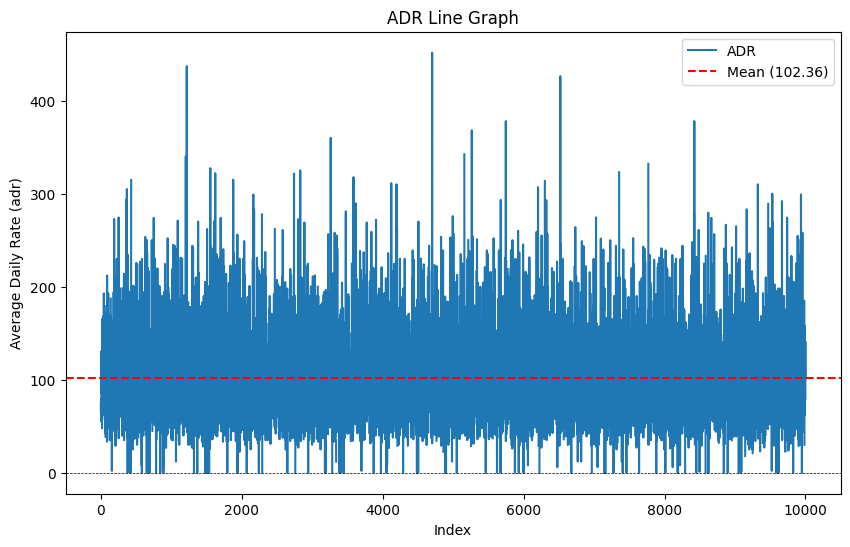

In [62]:
# Analyze the 'adr' column

print('Basic stats: \n', df.adr.describe())  # Get basic statistics of the 'adr' column
print("Missing values: ", df.adr.isnull().sum())  # Check for missing values in the 'adr' column
print("Zeros: ", (df.adr == 0).sum())  # Check for zeros in the 'adr' column

# Calculate the mean and std
adr_mean = df['adr'].mean()
adr_std = df['adr'].std()

# Calculate the mean, std
adr_mean_plus_std = adr_mean + adr_std
adr_mean_minus_std = adr_mean - adr_std

# Create a graph 
plt.figure(figsize=(10, 6))
plt.plot(df['adr'], label='ADR')

# Add 0 line to the graph
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

# Add mean
plt.axhline(adr_mean, color='red', linestyle='--', label=f'Mean ({adr_mean:.2f})')

# Add std lines
#plt.axhline(adr_mean + adr_std, color='violet', linewidth=1, linestyle='--', label=f'Mean + 1 STD ({adr_mean + adr_std:.2f})')
#plt.axhline(adr_mean - adr_std, color='violet', linewidth=1, linestyle='--', label=f'Mean - 1 STD ({adr_mean - adr_std:.2f})')


plt.xlabel('Index')
plt.ylabel('Average Daily Rate (adr)')
plt.title('ADR Line Graph')
plt.legend()
plt.show()

It’s not ok for ADR to include negative values or values as high as 4,000. ADR should always be non‑negative and fall within a reasonable range

How can be 0 adr, and no-canceled, but stayed 1 or more nights?

For missing values: 
Calculate the mean, from different group, by hotels and month or simple mean?

City Hotel -> ~106(adr), ~36(std) => less variability
Resort Hotel -> ~96(adr), ~60(std) => more variability 

August -> the bigger price => season
February, January -> the smallest price => extra season

=> I need to include both hotel and month for a better mean



In [59]:
# Analyze the adr per hotel and per month
adr_per_hotel = df.groupby('hotel')['adr'].describe()
adr_per_month = df.groupby('arrival_date_month')['adr'].describe()

# Calculate the mean ADR per hotel and month
# This will give the average ADR for each hotel in each month
mean_adr_by_hotels_months = (
    df.groupby(["hotel", "arrival_date_month"])["adr"].mean().reset_index(name="mean_adr")
)

print("\nADR per hotel:", adr_per_hotel)
print("\n\nADR per month:", adr_per_month)

print("\nMean ADR per hotel and month:", mean_adr_by_hotels_months)


ADR per hotel:                count        mean         std    min    25%    50%    75%  \
hotel                                                                      
City Hotel    6043.0  105.785736   38.182018 -130.0  79.80  99.95  126.0   
Resort Hotel  3065.0   96.975334  100.298218    0.0  51.75  75.00  125.4   

                 max  
hotel                 
City Hotel     451.5  
Resort Hotel  4515.0  


ADR per month:                      count        mean         std    min      25%     50%  \
arrival_date_month                                                           
April                812.0  102.452303   36.939298    0.0  80.0000   97.52   
August              1048.0  138.222195   60.112249    0.0  94.0375  129.75   
December             517.0   82.999671   44.467991    0.0  57.0400   75.00   
February             643.0   75.475801   29.734375    0.0  60.0000   75.00   
January              454.0   72.301652   25.713733    0.0  55.0000   74.80   
July                 959

In [64]:
# Adr cleaning
total_rows = len(df)
print("Total rows before cleaning: ", total_rows)

# Drop rows where 'adr' is less than 0 or greater than 1000
# This is based on the assumption that ADR should be non-negative and within a reasonable range
for x in df.index:
    if df.loc[x, 'adr'] < 0 or df.loc[x, 'adr'] > 1000:
        df.drop(x, inplace=True)
        

Total rows before cleaning:  9855


In [63]:
# Drop rows where 'adr' is 0, 'reservation_status' is 'Check-Out', and 'stays_in_weeks_nights' > 0
# This is based on the assumption that if a guest has checked out, they should have stayed and paid
for x in df.index:  
    if df.loc[x, 'adr'] == 0 and df.loc[x, 'reservation_status'] == 'Check-Out' and \
        df.loc[x, 'stays_in_weeks_nights'] > 0:
        df.drop(x, inplace=True)

print("Cleaned rows: ", total_rows-len(df))

Cleaned rows:  62


In [65]:
# Calculate the mean ADR per hotel and month
# This will give the average ADR for each hotel in each month
mean_adr_by_hotels_months = (
    df.groupby(["hotel", "arrival_date_month"], observed=False)["adr"].mean().reset_index(name="mean_adr")
)


# Merge the mean ADR back to the original DataFrame
df = df.merge(mean_adr_by_hotels_months, 
              on=["hotel", "arrival_date_month"], how="left")

df['adr'] = df['adr'].fillna(df['mean_adr'])  # Fill missing ADR values with the mean ADR of each hotel and month

# Drop the 'mean_adr' column as it's no longer needed
df.drop(columns=['mean_adr', 'mean_adr_x', 'mean_adr_y'], inplace=True, errors='ignore')

df


,Index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,stays_in_weeks_nights,is_agent,is_company,room_changed
0,0,Resort Hotel,0,203,2016,December,49,2,2.0,5,...,Transient,66.800000,0,0,Check-Out,12/9/2016,7.0,1,0,0
1,1,City Hotel,1,82,2015,July,29,16,0.0,3,...,Transient,76.500000,0,0,Canceled,7/16/2015,3.0,1,0,0
2,2,City Hotel,0,25,2016,December,53,27,0.0,3,...,Transient-Party,60.000000,0,1,Check-Out,12/30/2016,3.0,1,0,1
3,3,City Hotel,0,1,2016,March,11,9,0.0,1,...,Transient-Party,94.201907,0,0,Check-Out,3/10/2016,1.0,1,0,0
4,4,City Hotel,0,70,2017,April,16,16,2.0,2,...,Transient,108.000000,0,0,Check-Out,4/20/2017,4.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9850,9995,City Hotel,0,212,2016,May,21,20,2.0,3,...,Transient-Party,78.000000,0,1,Check-Out,5/25/2016,5.0,1,0,0
9851,9996,City Hotel,1,5,2016,February,7,13,2.0,1,...,Transient,79.000000,0,0,No-Show,2/13/2016,3.0,1,0,0
9852,9997,City Hotel,0,72,2017,July,30,27,1.0,3,...,Transient,109.800000,0,0,Check-Out,7/31/2017,4.0,1,0,0
9853,9998,City Hotel,0,10,2016,May,19,6,2.0,2,...,Transient,141.000000,0,1,Check-Out,5/10/2016,4.0,1,0,0


In [66]:
# Date formatting

# Creating a mapping for month names to numbers
months_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Create a new column 'arrival_date' by combining year, month, and day columns
df['arrival_date'] = pd.to_datetime(dict(
    year=df['arrival_date_year'], 
    month=df['arrival_date_month'].map(months_map), 
    day=df['arrival_date_day_of_month']
))

#df.arrival_date
#df

In [67]:
# Check the data types of the columns
print("\nData types of the columns:", df.dtypes)

print("\nNumber of the types: ", df.dtypes.value_counts())

# Display all columns in the DataFrame
#pd.set_option('display.max_columns', None)
#df


Data types of the columns: Index                                      int64
hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                  float64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled           

In [68]:
# Convert the data types

# Convert categorical columns to 'category' data type
categorical_columns = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
                       'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type',
                       'reservation_status']

for x in categorical_columns:
    df[x] = df[x].astype('category')


# Convert date columns to 'datetime' 

date_time_columns = ['arrival_date', 'reservation_status_date']

for x in date_time_columns:
    df[x] = pd.to_datetime(df[x], errors='coerce')

# Check the NaT values in the DataFrame after conversion
print("\nNaT values in the DataFrame after conversion:", 
      df[['arrival_date', 'reservation_status_date']].isna().sum() > 0)

# Convert int to float

int_columns = ['stays_in_weekend_nights', 'stays_in_weeks_nights']

for x in int_columns:
    df[x] = df[x].astype(float)



NaT values in the DataFrame after conversion: arrival_date               False
reservation_status_date    False
dtype: bool


In [249]:
# Check the country column

print("Country counts: ", df['country'].value_counts())

country_counts = 0
# Count the number of countries with less than 30 entries => rare countries
# This will help to identify countries that may not have enough data for analysis
for x in df['country'].value_counts():
    if x < 30:
        country_counts += 1

print("Less than 50 entries in country: ", country_counts)



Country counts:  country
PRT    3972
GBR    1022
FRA     878
ESP     686
DEU     569
       ... 
TGO       1
TWN       1
TUN       1
TZA       1
UGA       1
Name: count, Length: 110, dtype: int64
Less than 50 entries in country:  84


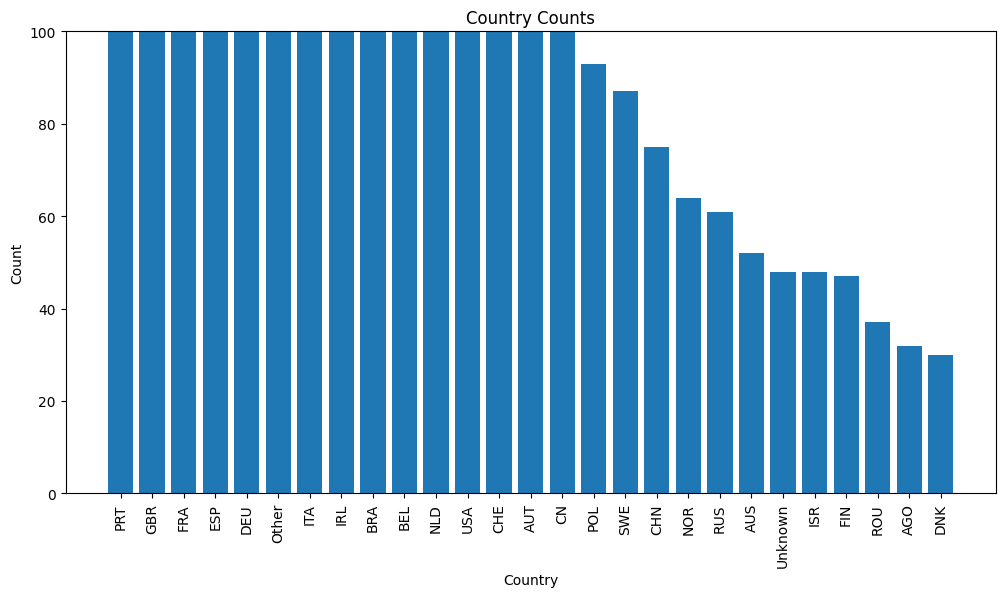

In [70]:
# Analyze the 'country' column

country_counts = df['country'].value_counts()
country_counts = country_counts.sort_values(ascending=False) # Sort countries by count asc

plt.figure(figsize=(12, 6))
plt.bar(country_counts.index, country_counts.values)
#plt.ylim(0, 300)
plt.ylim(0, 100)
plt.xticks(rotation=90)
plt.title('Country Counts')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


In [69]:
# List of rare countries
# This will give a list of countries that have less than 30 entries in the dataset
rare_countries = df['country'].value_counts()[df['country'].value_counts() < 30].index.tolist()
print("Rare countries: ", rare_countries)

df['country'] = df['country'].replace(rare_countries, 'Other')  # Replace rare countries with 'Other'


Rare countries:  ['MAR', 'LUX', 'TUR', 'IND', 'ARG', 'JPN', 'CZE', 'HUN', 'KOR', 'GRC', 'DZA', 'SRB', 'EST', 'MEX', 'ISL', 'BGR', 'CHL', 'ARE', 'LTU', 'HRV', 'COL', 'BIH', 'NZL', 'SAU', 'LVA', 'IRN', 'SVN', 'GEO', 'SVK', 'VEN', 'CRI', 'CYP', 'THA', 'UKR', 'ZAF', 'IDN', 'ARM', 'KEN', 'TMP', 'URY', 'MDV', 'MYS', 'MUS', 'NGA', 'MOZ', 'ECU', 'DOM', 'AZE', 'EGY', 'HKG', 'BGD', 'ALB', 'GTM', 'GNB', 'GIB', 'BRB', 'CIV', 'BLR', 'BOL', 'BEN', 'AND', 'KAZ', 'JAM', 'JOR', 'MAC', 'KWT', 'LCA', 'LIE', 'MYT', 'MWI', 'MKD', 'MCO', 'PHL', 'PAK', 'PRI', 'PRY', 'SEN', 'SGP', 'QAT', 'TGO', 'TWN', 'TUN', 'TZA', 'UGA']


C:\Users\admin\AppData\Local\Temp\ipykernel_22492\1119517018.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['country'] = df['country'].replace(rare_countries, 'Other')  # Replace rare countries with 'Other'


In [252]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv('../data/cleaned/hotel_booking_cancellation_prediction_cleaned.csv', index=False)

'hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
                       'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type',
                       'reservation_status'

In [253]:
# Encoding

one_hot_columns = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 
                   'reserved_room_type', 'customer_type']

# One-hot encode the categorical columns
df = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)

df.drop(columns=one_hot_columns, inplace=True, errors='ignore')  # Drop the columns to be one-hot encoded

#df.columns




In [254]:
# Dropping unnecessary columns
drop_columns = ['Index', 'reservation_status_date', 'reservation_status', 'assigned_room_type']

df.drop(columns=drop_columns, inplace=True, errors='ignore')

In [255]:
df['lead_time'].isnull().sum()  # Check for missing values in 'lead_time' column

np.int64(0)


Lead time cancellation rate: lead_time_group
0-1_months     19.055322
1-3_months     37.373737
3-6_months     45.876521
6-12_months    57.880286
>1_year        67.871486
Name: is_canceled, dtype: float64
Missing lead_time_group values:  0


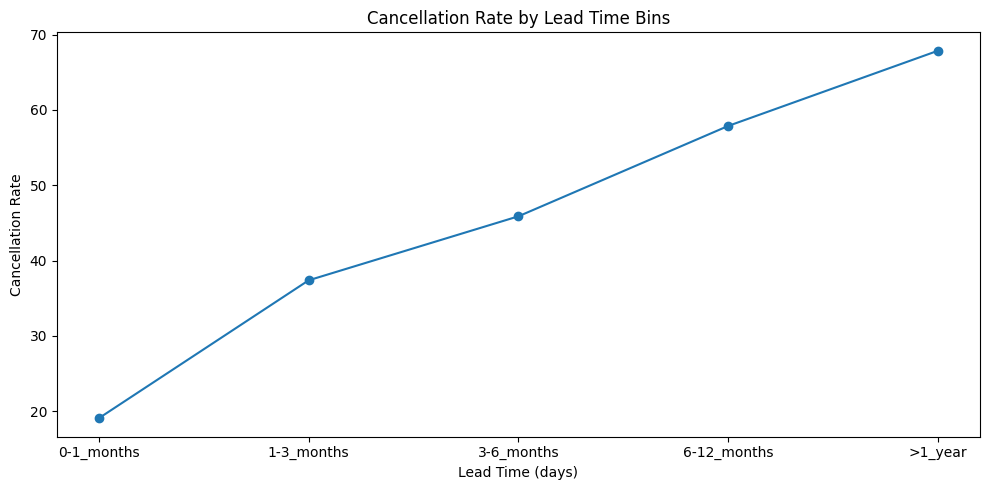

In [256]:
# Analyze the lead time column
bins = [0, 30, 90, 180, 366, float('inf')]
labels = ['0-1_months', '1-3_months', '3-6_months', '6-12_months', '>1_year']

df['lead_time_group'] = pd.cut(df['lead_time'], bins=bins, labels=labels,  include_lowest=True) # create lead time groups

# Calculate the percentage of cancellations in each lead time group
lead_time_cancellation_rate = df.groupby('lead_time_group', observed=False)['is_canceled'].mean() * 100
print("\nLead time cancellation rate:", lead_time_cancellation_rate)

print("Missing lead_time_group values: ", 
      df['lead_time_group'].isnull().sum())  # Check for missing values in 'lead_time_group'

# Create a plot for lead time cancellation rate
plt.figure(figsize=(10, 5))
plt.plot(lead_time_cancellation_rate.index, lead_time_cancellation_rate.values, marker='o')
plt.title("Cancellation Rate by Lead Time Bins")
plt.xlabel("Lead Time (days)")
plt.ylabel("Cancellation Rate")
plt.tight_layout()
plt.show()

#df

In [257]:
# Lead time encoding
risk_map_lead_time = {
    '0-1_months': 0, 
    '1-3_months': 1, 
    '3-6_months': 2, 
    '6-12_months': 3,
    '>1_year': 4
}

df['cancellation_risk_lead_time'] = df['lead_time_group'].map(risk_map_lead_time)


# Drop the 'lead_time_group' column as it's no longer needed
df.drop(columns=['lead_time_group'], inplace=True, errors='ignore')
#df.drop(columns=['lead_time'], inplace=True, errors='ignore')  # Drop the 'lead_time' column as well

#df

Deposit type counts:  deposit_type
No Deposit    8552
Non Refund    1288
Refundable      15
Name: count, dtype: int64

Proportion:  deposit_type
No Deposit    86.778285
Non Refund    13.069508
Refundable     0.152207
Name: count, dtype: float64

Deposit cancellation rate: deposit_type
No Deposit    28.893826
Non Refund    99.534161
Refundable    13.333333
Name: is_canceled, dtype: float64


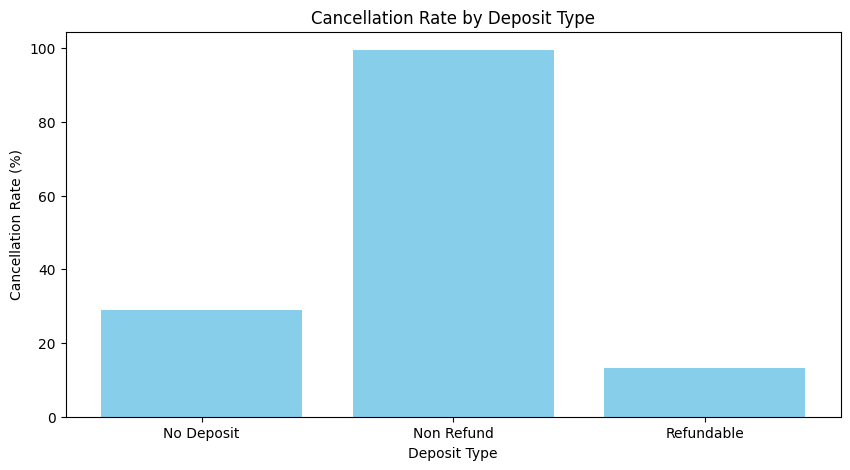

In [258]:
# Analyze the 'deposite_type' column

# View the number of deposit types
deposit_counts = df['deposit_type'].value_counts()
print("Deposit type counts: ", deposit_counts)

# View the proportion of deposit types
deposit_proportion = deposit_counts / len(df) * 100
print("\nProportion: ", deposit_proportion)

# Calculate the cancellation rate for each deposit type
deposit_cancellation_rate = df.groupby('deposit_type', observed=False)['is_canceled'].mean() * 100
print("\nDeposit cancellation rate:", deposit_cancellation_rate)

# Create a plot for deposit cancellation rate
plt.figure(figsize=(10, 5))
plt.bar(deposit_cancellation_rate.index, deposit_cancellation_rate.values, color='skyblue')
plt.title("Cancellation Rate by Deposit Type")
plt.xlabel("Deposit Type")
plt.ylabel("Cancellation Rate (%)") 
plt.show()

In [259]:
# Ordinal encoding for deposit type

risk_map = {
    'Refundable': 0,
    'No Deposit': 1,
    'Non Refund': 2
}

df['deposit_risk'] = df['deposit_type'].map(risk_map)

# Drop the 'deposit_type' column as it's no longer needed
#df.drop(columns=['deposit_type'], inplace=True, errors='ignore')

df.columns
#df_ordinal_deposit

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'stays_in_weeks_nights', 'is_agent',
       'is_company', 'is_children', 'is_babies', 'room_changed',
       'arrival_date', 'hotel_Resort Hotel', 'meal_FB', 'meal_HB', 'meal_SC',
       'country_Other', 'country_AUS', 'country_AUT', 'country_BEL',
       'country_BRA', 'country_CHE', 'country_CHN', 'country_CN',
       'country_DEU', 'country_DNK', 'country_ESP', 'country_FIN',
       'country_FRA', 'country_GBR', 'country_IRL', 'country_ISR',
       'country_ITA', 'country_NLD', 'country_NOR', 'country_POL',
       'country_P

In [260]:
# Save the cleaned and encoded data to a new CSV file - ordinal encoding for deposit type
df.to_csv('../data/results/hotel_booking_cancellation_prediction_encoded_ordinal_deposit.csv', index=False)

In [261]:
# One-hot encoding for deposit type
df.drop(columns=['deposit_risk'], inplace=True)

df_one_hot_deposit = df.copy()
df_one_hot_deposit = pd.get_dummies(df_one_hot_deposit, columns=['deposit_type'], prefix='deposit', drop_first=True)

df.drop(columns=['deposit_type'], inplace=True, errors='ignore')  # Drop the 'deposit_type' column as it's no longer needed

#df_one_hot_deposit



In [262]:
# Save the cleaned and encoded data to a new CSV file - one-hot encoding for deposit type
df_one_hot_deposit.to_csv('../data/results/hotel_booking_cancellation_prediction_one_hot_deposit.csv', index=False)
